## <div style="direction:rtl;text-align:center;font-family:B Lotus, B Nazanin, Tahoma"> فاطمه حبیبی مقدم</div>

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:250%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">DIP Final Projects</div>

<div style="padding:20px;
            color:darkblue;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:white;
            overflow:hidden;
            font-weight:700">Motion Detection (Using Surveillance Camera)</div>

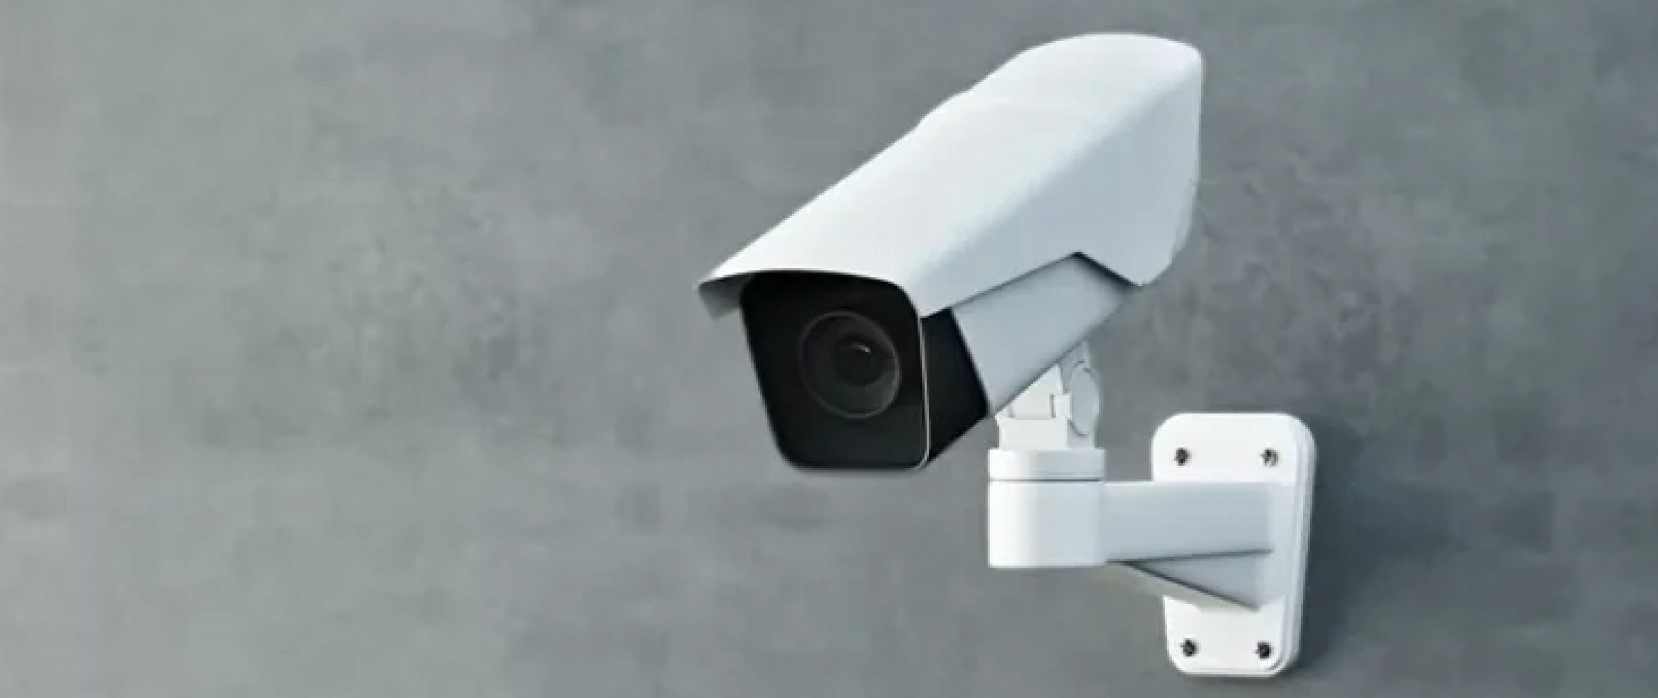

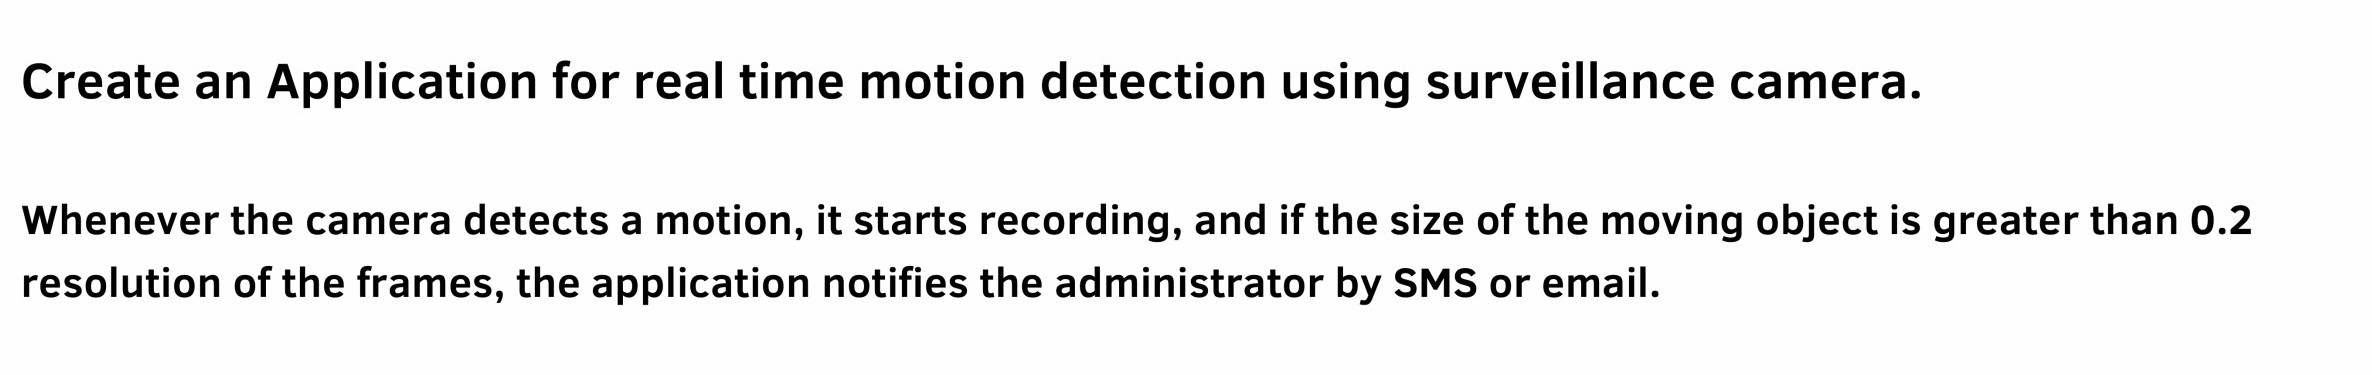

<span style="color:red;font-weight:700;font-size:25px">
    &#10148; Note 1: In order to send Email notification the Internet should be on.
</span> 

<span style="color:red;font-weight:700;font-size:25px">
    &#10148; Note 2: In order to use Email notification, please follow the instructions below:
</span> 

<span style="color:blue;font-weight:7500;font-size:20px">
    &#10148; yag = yagmail.SMTP("Sender's gmail Address", "Sender's gmail Address Password")
</span> 

<span style="color:blue;font-weight:500;font-size:20px">
    &#10148; yag.send("Receiver's gmail Address","Subject Of Mail","Content Of Mail", attachments=['Attachment1.png'])
</span> 

<span style="color:red;font-weight:700;font-size:25px">
    &#10148; Note 3:
</span>

To fill the "Sender's gmail Address Password", you should enter the app password. The app password is the 16-character code. To create an app password, you need 2-Step Verification on your Google Account:

* Go to your Google Account.
* Select Security.
* Under "Signing in to Google," select 2-Step Verification.
* At the bottom of the page, select App passwords.
* Enter a name that helps you remember where you’ll use the app password.
* Select Generate.
* Select Done.

In [1]:

#####----------------------------Installing yagmail and its packages---------------------------#####
!pip install yagmail

In [2]:
 
#####--------------------------------Importing libraries-----------------------------------####
    
# Importing OpenCV 
import cv2

# Importing Numpy 
import numpy as np

# Importing the time module  
import time

# Importing the datetime function of the datetime module  
from datetime import datetime

# Importing the
import winsound


####--------------------Defining a function to resizres the given image--------------------####
    
def resize_img (img , scale_precent):
    """
    This function resizres the given image.
    """
    width = int (img.shape[1]*scale_precent/100)
    hight = int (img.shape[0]*scale_precent/100)
    dim = (width , hight)
    resized = cv2.resize (img , dim)
    return resized

####-----------------------------------Motion Detection ------------------------------------####
    
# capture the video-feed from the webcam
cam = cv2.VideoCapture (0)

if not cam.isOpened ():
        print ("Error starting video capture!")
        
detected_motion = False
frame_rec_count = 0

# Defining the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc (*'X264')

# FPS set to 20 
# cv2.VideoWriter("/your path/filename.mp4",fourcc, fps, (w, h))
out = cv2.VideoWriter ('C:/Users/DearUser/Desktop/output.mp4' , fourcc , 20.0 , (768 , 432))

# Using infinite loop to capture the frames from the video 
while (True):
    
    # Using the read method to capture the video frames
    ret, frame1 = cam.read ()
    frame1_resized = resize_img (frame1 , 40)
       
    ret, frame2 = cam.read ()
    frame2_resized = resize_img (frame2 , 40)
    
    # Subtracting the frames
    diff = cv2.absdiff (frame1_resized , frame2_resized)
    
    # Converting to gray color
    gray = cv2.cvtColor (diff , cv2.COLOR_RGB2GRAY)
    
    # Converting to blur
    blur = cv2.GaussianBlur (gray , (5 , 5) , 0)
    
    # Creating a threshold 
    _, thresh = cv2.threshold (blur , 20 , 255 , cv2.THRESH_BINARY)
    
    # Creating a dilation - remove the noise
    dilated = cv2.dilate (thresh , None , iterations = 3)
    
    # Creating contours
    contours, _ = cv2.findContours (dilated , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
    
    # Creating a for-loop
    for c in contours:
        
        # Ignoring small contours
        threshold_area = 2000 
        area = cv2.contourArea (c)
        if area < threshold_area:
            continue
            
        # Drawing bounding box around contour
        x, y, w, h = cv2.boundingRect (c)
        cv2.rectangle (frame1_resized , (x , y) , (x+w , y+h) , (250 , 0 , 250) , 3)
        
        detected_motion = True
        
        print("Motion is detected at {}. Recording is started.".format (datetime.now().time().replace(microsecond=0))) 
        
        if detected_motion:
            out.write (frame1_resized)
            frame_rec_count = frame_rec_count + 1
             
        if area > (0.2*(432*768)):    
            winsound.Beep (600 , 300)
            winsound.PlaySound ('sound.wav' , winsound.SND_ASYNC)
            
            print ("The size of the moving object is greater than 0.2 resolution of the frames. An email alert is sent.") 
            
            
            ####---------------------Creating and sending the Email notification-----------------------####
            # importing yagmail and its packages        
            import yagmail

            ####initiating connection with SMTP server
            yag = yagmail.SMTP("habimo384@gmail.com", "nyrewvgdzlznvltg")

            # Adding Content and sending it
            body = 'A motion is just detected at {}. \nRecording is started.'.format (datetime.now().time().replace(microsecond=0))
            body += '\n\nTime: %s' % str(datetime.now())
            yag.send("لطفا جیمیل خودتون رو وارد کنید", "Email notification", body)
            ####---------------------------------------------------------------------------------------####
    
    
    # Displaying the webcam video feed
    cv2.imshow ('Webcam' , frame1_resized)
 
    # Breaking the loop when 'q' is pressed.
    if cv2.waitKey (1) & 0xFF == ord ('q'):
        break

####---------------------Fetching the fps, dimensions, and resolution----------------------####

fps = cam.get (cv2.CAP_PROP_FPS)
width = int (cam.get(3))  # ID number for width is 3
height = int (cam.get(4)) # ID number for height is 480
print ("Frames per second: " + str (fps) + ". Resolution of the cam is: " + str (width) + "x" + str (height) + ".")

####---------------------Fetching the fps, dimensions, and resolution----------------------####

wid = frame1_resized.shape[1]
hgt = frame1_resized.shape[0]
# Displaying the dimensions
print ("Resolution of the resized image is:" , str (wid) + "x" + str (hgt) + ".")

    
####----------Releasing the camera & the recorded movie and closing all windows-----------####

# Releasing the camera
cam.release ()
# Releasing the recorded movie
out.release ()
# Closing all windows
cv2.destroyAllWindows ()

Motion is detected at 16:28:46. Recording is started.
Motion is detected at 16:28:46. Recording is started.
Motion is detected at 16:28:46. Recording is started.
Motion is detected at 16:28:46. Recording is started.
Motion is detected at 16:28:46. Recording is started.
Motion is detected at 16:28:46. Recording is started.
Motion is detected at 16:28:46. Recording is started.
Motion is detected at 16:28:46. Recording is started.
Motion is detected at 16:28:46. Recording is started.
Motion is detected at 16:28:46. Recording is started.
Motion is detected at 16:28:46. Recording is started.
Motion is detected at 16:28:47. Recording is started.
Motion is detected at 16:28:47. Recording is started.
Motion is detected at 16:28:47. Recording is started.
Motion is detected at 16:28:47. Recording is started.
Motion is detected at 16:28:47. Recording is started.
Motion is detected at 16:28:47. Recording is started.
Motion is detected at 16:28:47. Recording is started.
Motion is detected at 16:28:

<span style="color:red;font-weight:700;font-size:25px">
    &#10148; Note 4:
</span>

* In order to increse the speed of process, it is better not to put the following command in the while loop.

* print("Motion is detected at {}. Recording is started.".format (datetime.now().time().replace(microsecond=0)))
